# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
75422,0.0391,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.2026,0.0024,0.0024,10,0,9,0
429179,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0415,0.1001,0.0269,0,0,0,0
439089,0.2466,0.2734,0.1099,0.0024,0.0024,0.0049,0.3223,0.3979,0.0562,0.0269,8,8,20,20
159064,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1807,0.0537,0.0024,0.0293,0,0,0,0
238442,0.1147,0.0024,0.0195,0.0024,0.0024,0.0024,0.0708,0.0513,0.0024,0.1074,4,4,17,17


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

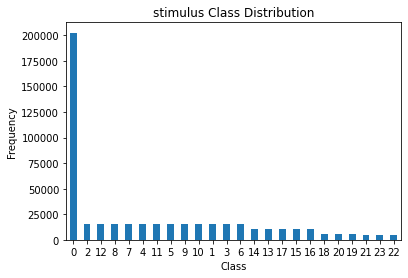

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
245968,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1489,0.0024,0.0586,0,0,0,0
291010,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0220,0.0830,0.0024,0.0562,0,0,0,0
371190,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0684,0.0732,0.1221,0.0024,0,0,0,0
206924,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0635,0.0024,0.0586,0,0,0,0
343900,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0024,0.0391,0,0,0,0


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Hyperparameter Tuning -- Random Forest

https://www.section.io/engineering-education/hyperparmeter-tuning/
    
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Tuned_RandomForestClassifier = RandomForestClassifier()

## Current Parameters 

In [ ]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(Tuned_RandomForestClassifier.get_params())

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {}

In [ ]:
grid_search = GridSearchCV(estimator = Tuned_RandomForestClassifier, param_grid = param_grid, 
                          cv = 3)

In [ ]:
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

# Splitting Data for Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(**************)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.57523082409817


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     40005
           1       0.92      0.88      0.90      2108
           2       0.96      0.85      0.90      1923
           3       0.91      0.85      0.88      2110
           4       0.92      0.86      0.89      1957
           5       0.91      0.88      0.90      2046
           6       0.94      0.86      0.90      2187
           7       0.93      0.87      0.90      1753
           8       0.91      0.84      0.87      1740
           9       0.92      0.87      0.89      1876
          10       0.94      0.85      0.89      2030
          11       0.91      0.88      0.89      1940
          12       0.87      0.77      0.82      2123
          13       0.95      0.88      0.91      1332
          14       0.91      0.92      0.91      1226
          15       0.96      0.88      0.92      1161
          16       0.95      0.92      0.94      1543
 

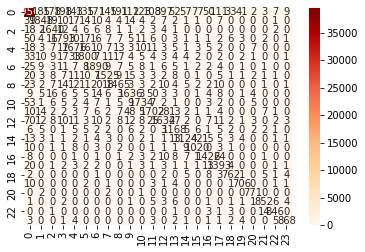

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.4498527216769916
MSE: 4.7246753932925625
RMSE: 2.173631844009597


In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9355267751346538
Recall Score :  0.9357523082409817
f1_score :  0.9347264619293166
